In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns=None
df = pd.read_csv('Global Power Plant Dataset')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

Key attributes of the database:

-  `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
-  `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information


In [3]:
df.isnull().sum().any()

True

We see that we have Nan values present in the dataset

In [4]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

We see a lot of null values in the dataset, lets drop the columns which have more than 600 null values in the dataset

Columns to be Dropped:
        
        other_fuel1                 709
        other_fuel2                 906
        other_fuel3                 907
        wepp_id                     907
        generation_gwh_2013         907
        generation_gwh_2019         907
        estimated_generation_gwh    907

In [5]:
df.drop(['other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

In [6]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see that country and country_long represent one and the same information. Hnece we could drop country.

We also see that 'source', 'geolocation_source','generation_data_source' are not useful columns either as they represent the sources from where the data was collected, we could drop them too.

'Owner','url' as well would not be a useful column.


In [7]:
df.drop(['url','generation_data_source','country','geolocation_source','source','owner','name'],axis=1,inplace=True)

In [8]:
df

,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,India,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN,NaN
1,India,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,India,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,India,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,2019.0,NaN,0.994875,233.596650,865.400000,686.500000
903,India,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,India,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,India,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Working on Missing values

In [9]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


Having just 1 value for the entire dataset doesnot add any value to model hence we could drop year_of_capacity_data too.

In [10]:
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [11]:
df.isnull().sum()

country_long             0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

lets replace the missing values with mean.

In [12]:
df = df.fillna(df.mean())

In [13]:
df.isnull().sum()

country_long           0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

We do not have any null values anymore

### Visualization

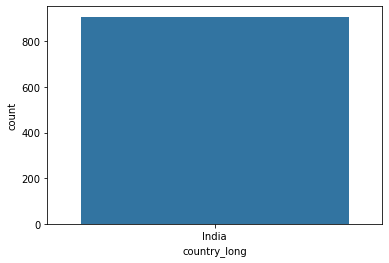

In [14]:
sns.countplot(df['country_long'])
plt.show()

We see that the description says it covers approximately 35,000 power plants from 167 countries, but the data is for India only.

Having just 1 value for the entire dataset doesnot add any value to model hence we could drop country_long too.

In [15]:
df.drop('country_long',axis=1,inplace=True)

In [16]:
fuel_capacity = df.pivot_table(values='capacity_mw',index = 'primary_fuel')
fuel_capacity

,capacity_mw
primary_fuel,
Biomass,20.065200
Coal,797.826434
Gas,364.818928
Hydro,185.026972
Nuclear,975.555556
Oil,88.942000
Solar,21.712598
Wind,33.429675


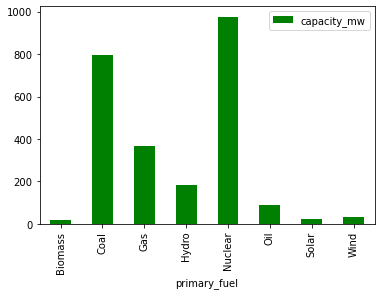

In [17]:
fuel_capacity.plot(kind='bar',color = 'g')
plt.show()

We see that the production output in-terms of mw is the highest for Nuclear Fuel followed by Coal and is lowest for Biomass, Wind and Solar

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64



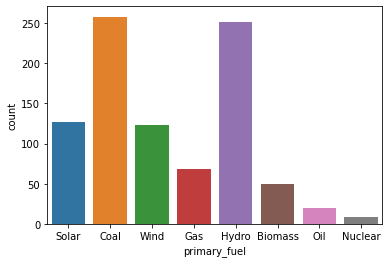

In [18]:
print(df['primary_fuel'].value_counts())
print()
sns.countplot(df['primary_fuel'])
plt.show()

We see that the count of Hydro and Coal powered plants is highest in India, and Nuclear is the lowest

In [19]:
fuel_generation = df.pivot_table(values=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'],index=df['primary_fuel'])
fuel_generation

,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
primary_fuel,,,,,
Biomass,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
Coal,3870.499446,3952.182405,4085.689067,4231.323190,4375.594443
Gas,1145.058751,1162.376201,1088.014849,1195.202572,1126.304831
Hydro,1339.666775,1257.636085,1234.836116,1203.515597,1242.399004
Nuclear,4326.282259,4034.136327,4072.089651,4126.119923,4090.783789
Oil,1166.305367,1104.642673,1113.209866,1656.102163,1170.524212
Solar,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
Wind,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


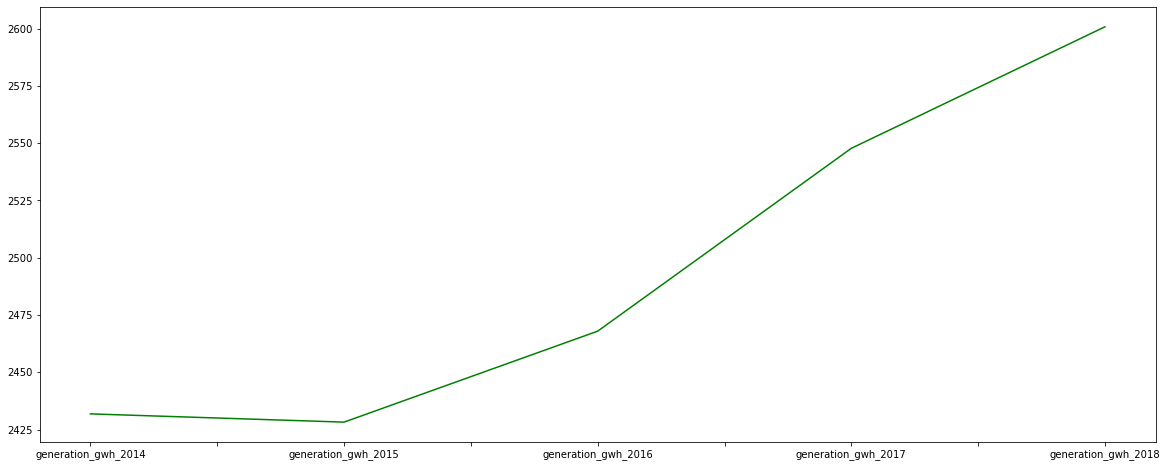

In [20]:
Biomass = fuel_generation.iloc[0]
Biomass.plot(kind = 'line',figsize=(20,8),c='g')
plt.show()

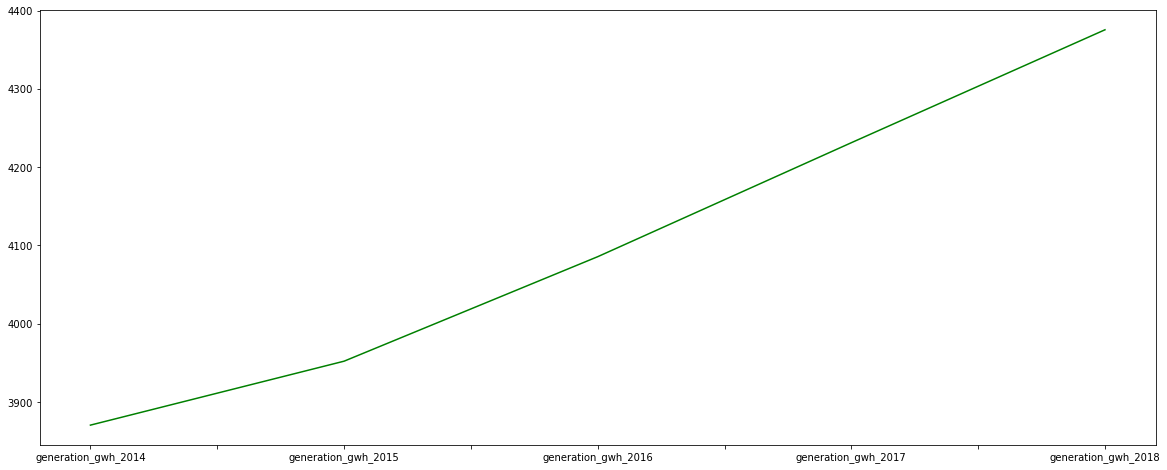

In [377]:
Coal = fuel_generation.iloc[1]
Coal.plot(kind = 'line',figsize=(20,8),c='g')
plt.show()

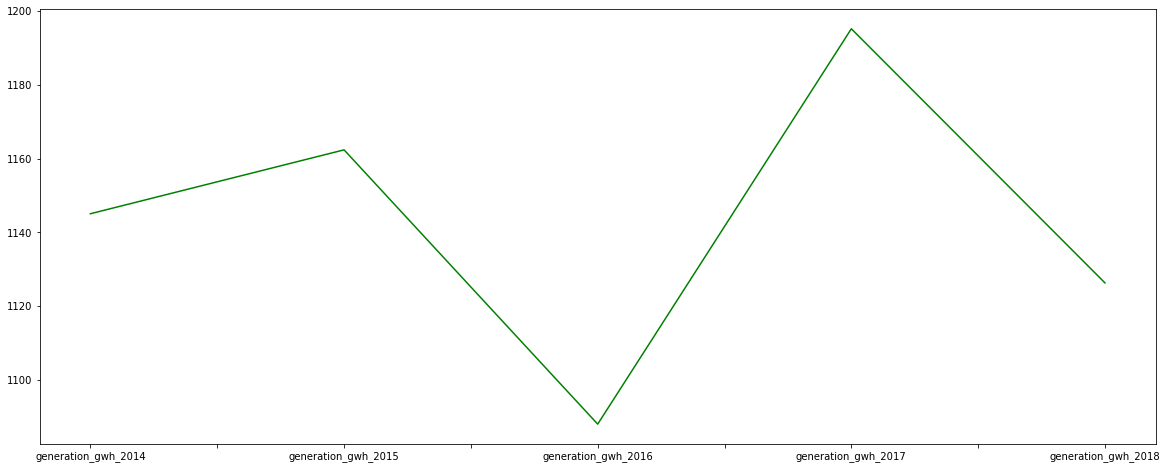

In [378]:
Gas = fuel_generation.iloc[2]
Gas.plot(kind = 'line',figsize=(20,8),c='g')
plt.show()

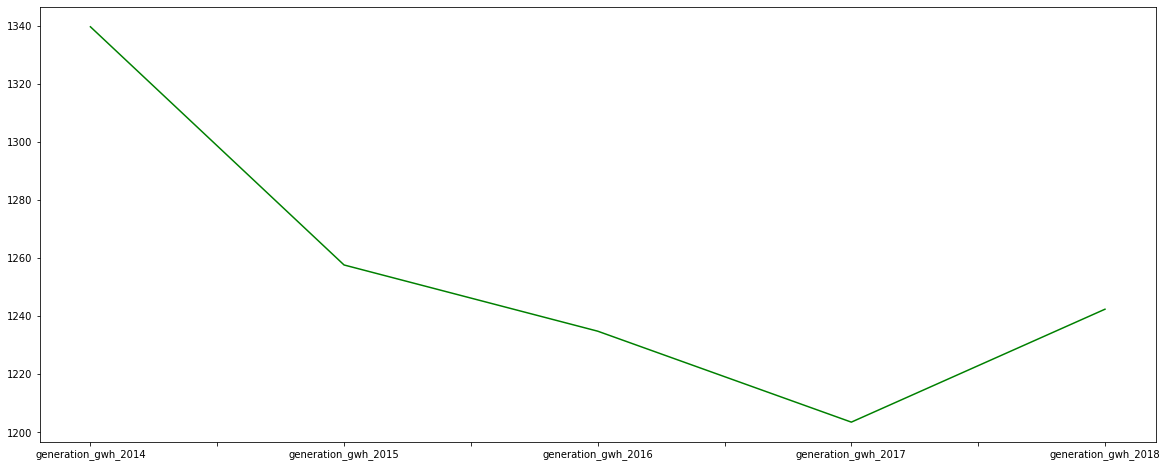

In [379]:
Hydro = fuel_generation.iloc[3]
Hydro.plot(kind = 'line',figsize=(20,8),c='g')
plt.show()

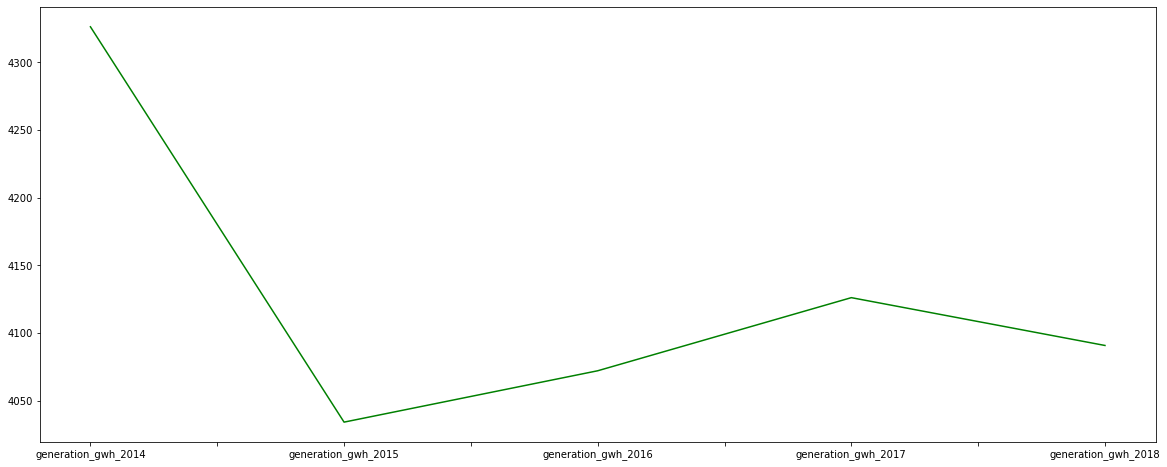

In [380]:
Nuclear = fuel_generation.iloc[4]
Nuclear.plot(kind = 'line',figsize=(20,8),c='g')
plt.show()

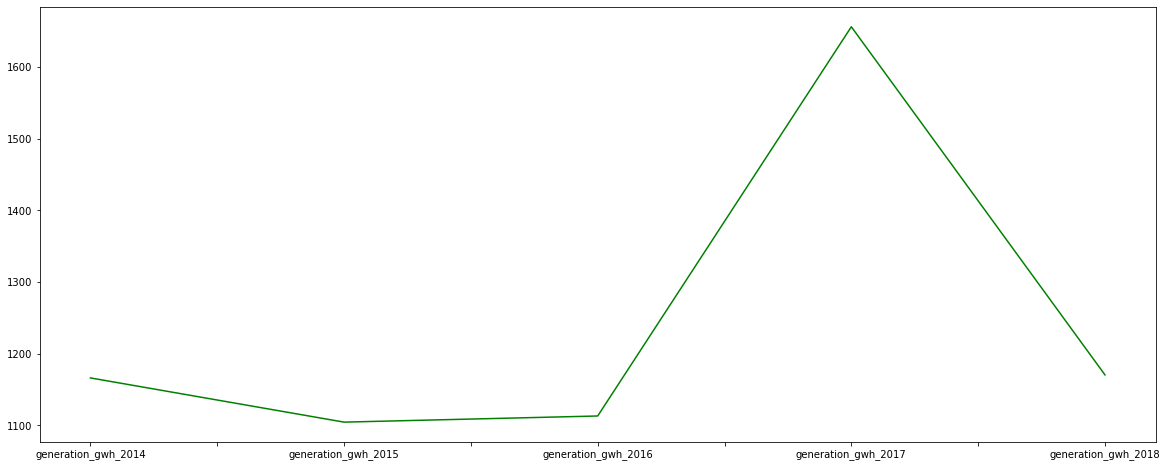

In [381]:
Oil = fuel_generation.iloc[5]
Oil.plot(kind = 'line',figsize=(20,8),c='g')
plt.show()

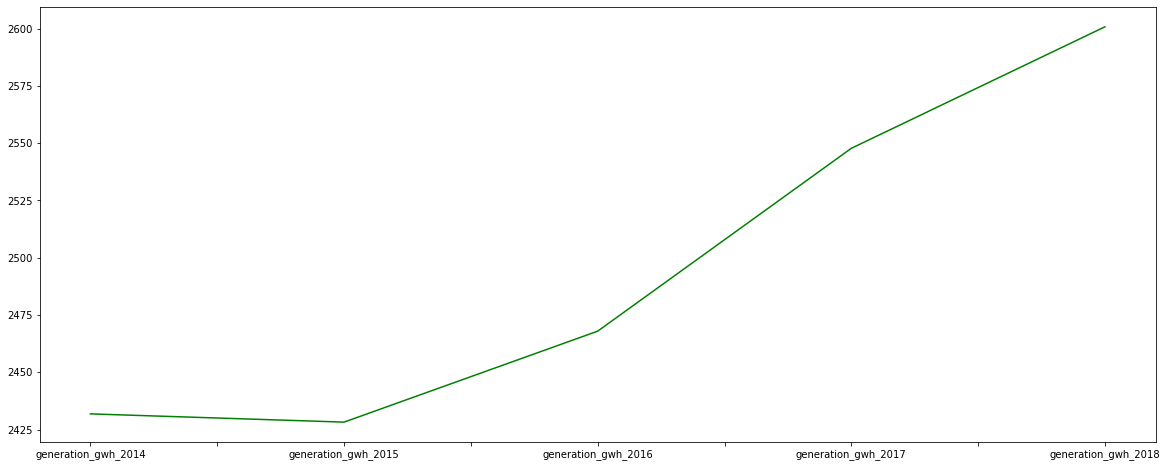

In [382]:
Solar = fuel_generation.iloc[6]
Solar.plot(kind = 'line',figsize=(20,8),c='g')
plt.show()

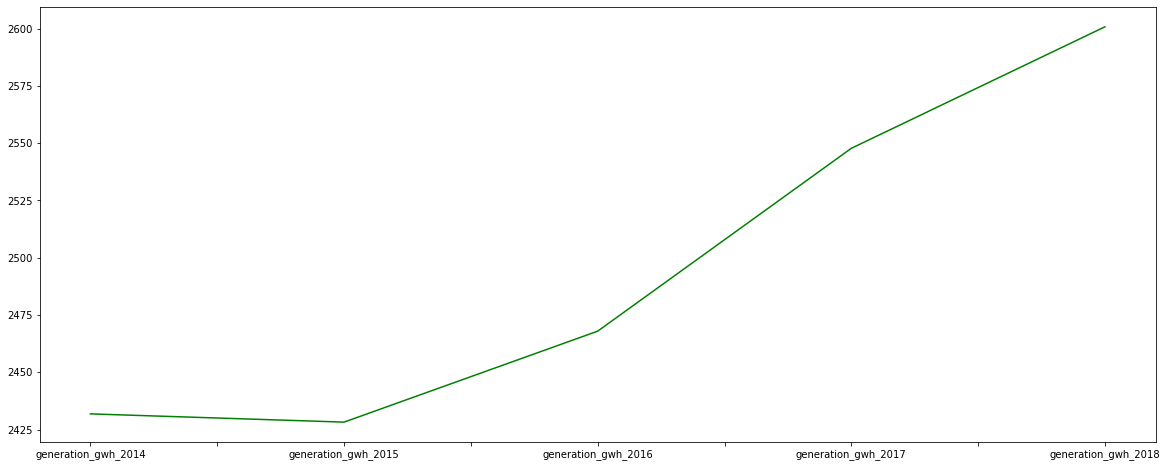

In [383]:
Wind = fuel_generation.iloc[7]
Wind.plot(kind = 'line',figsize=(20,8),c='g')
plt.show()

We see that the Coal is the major source of fuel in India but the but post 2015 we see India is moving towards renewable sources of energy such as Wind, Solar and Biomass

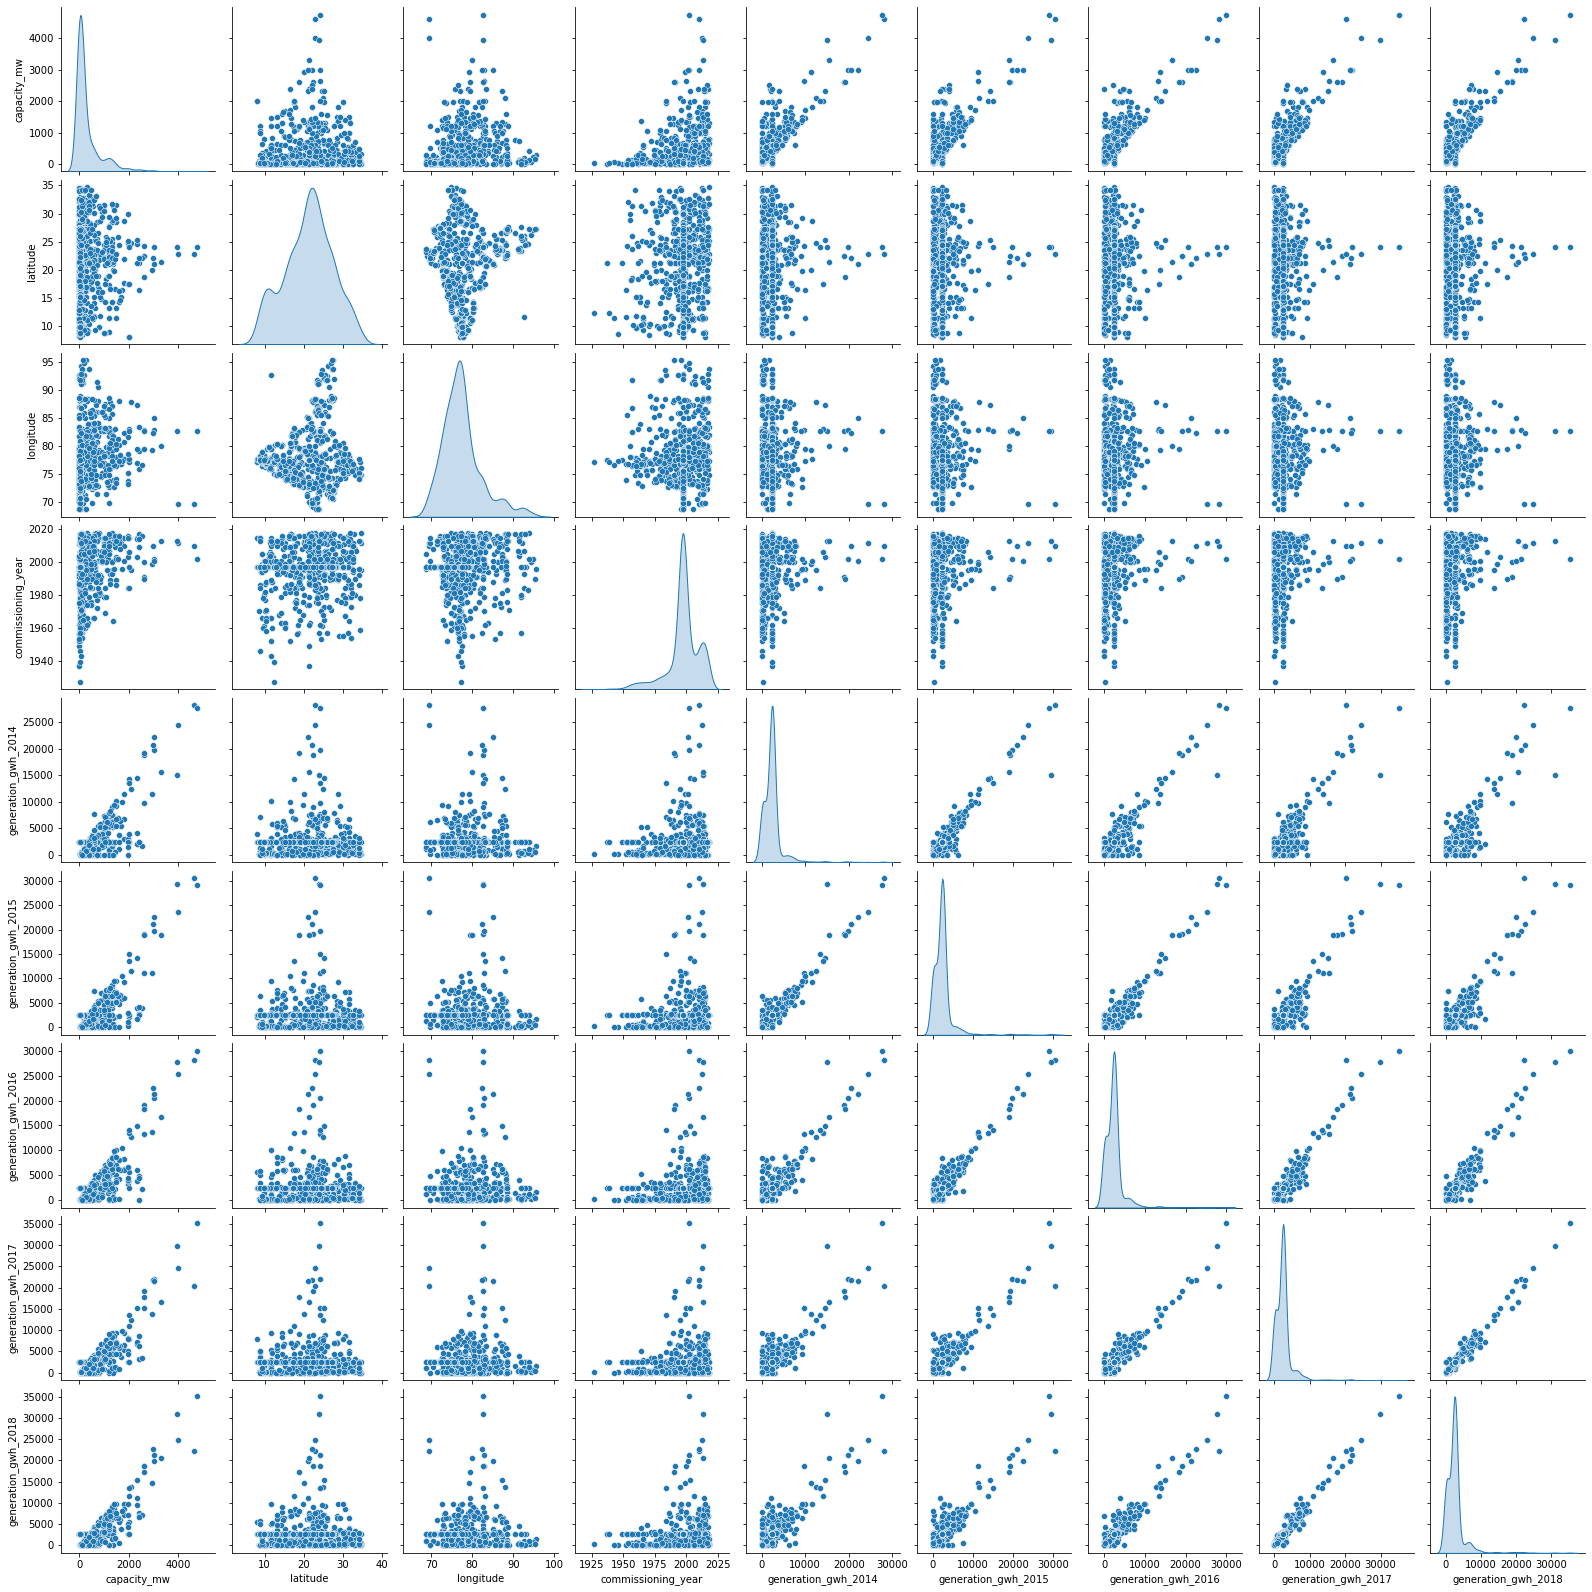

In [386]:
sns.pairplot(df,diag_kind='kde')
plt.show()

### Checking Skewness

In [21]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.399359
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

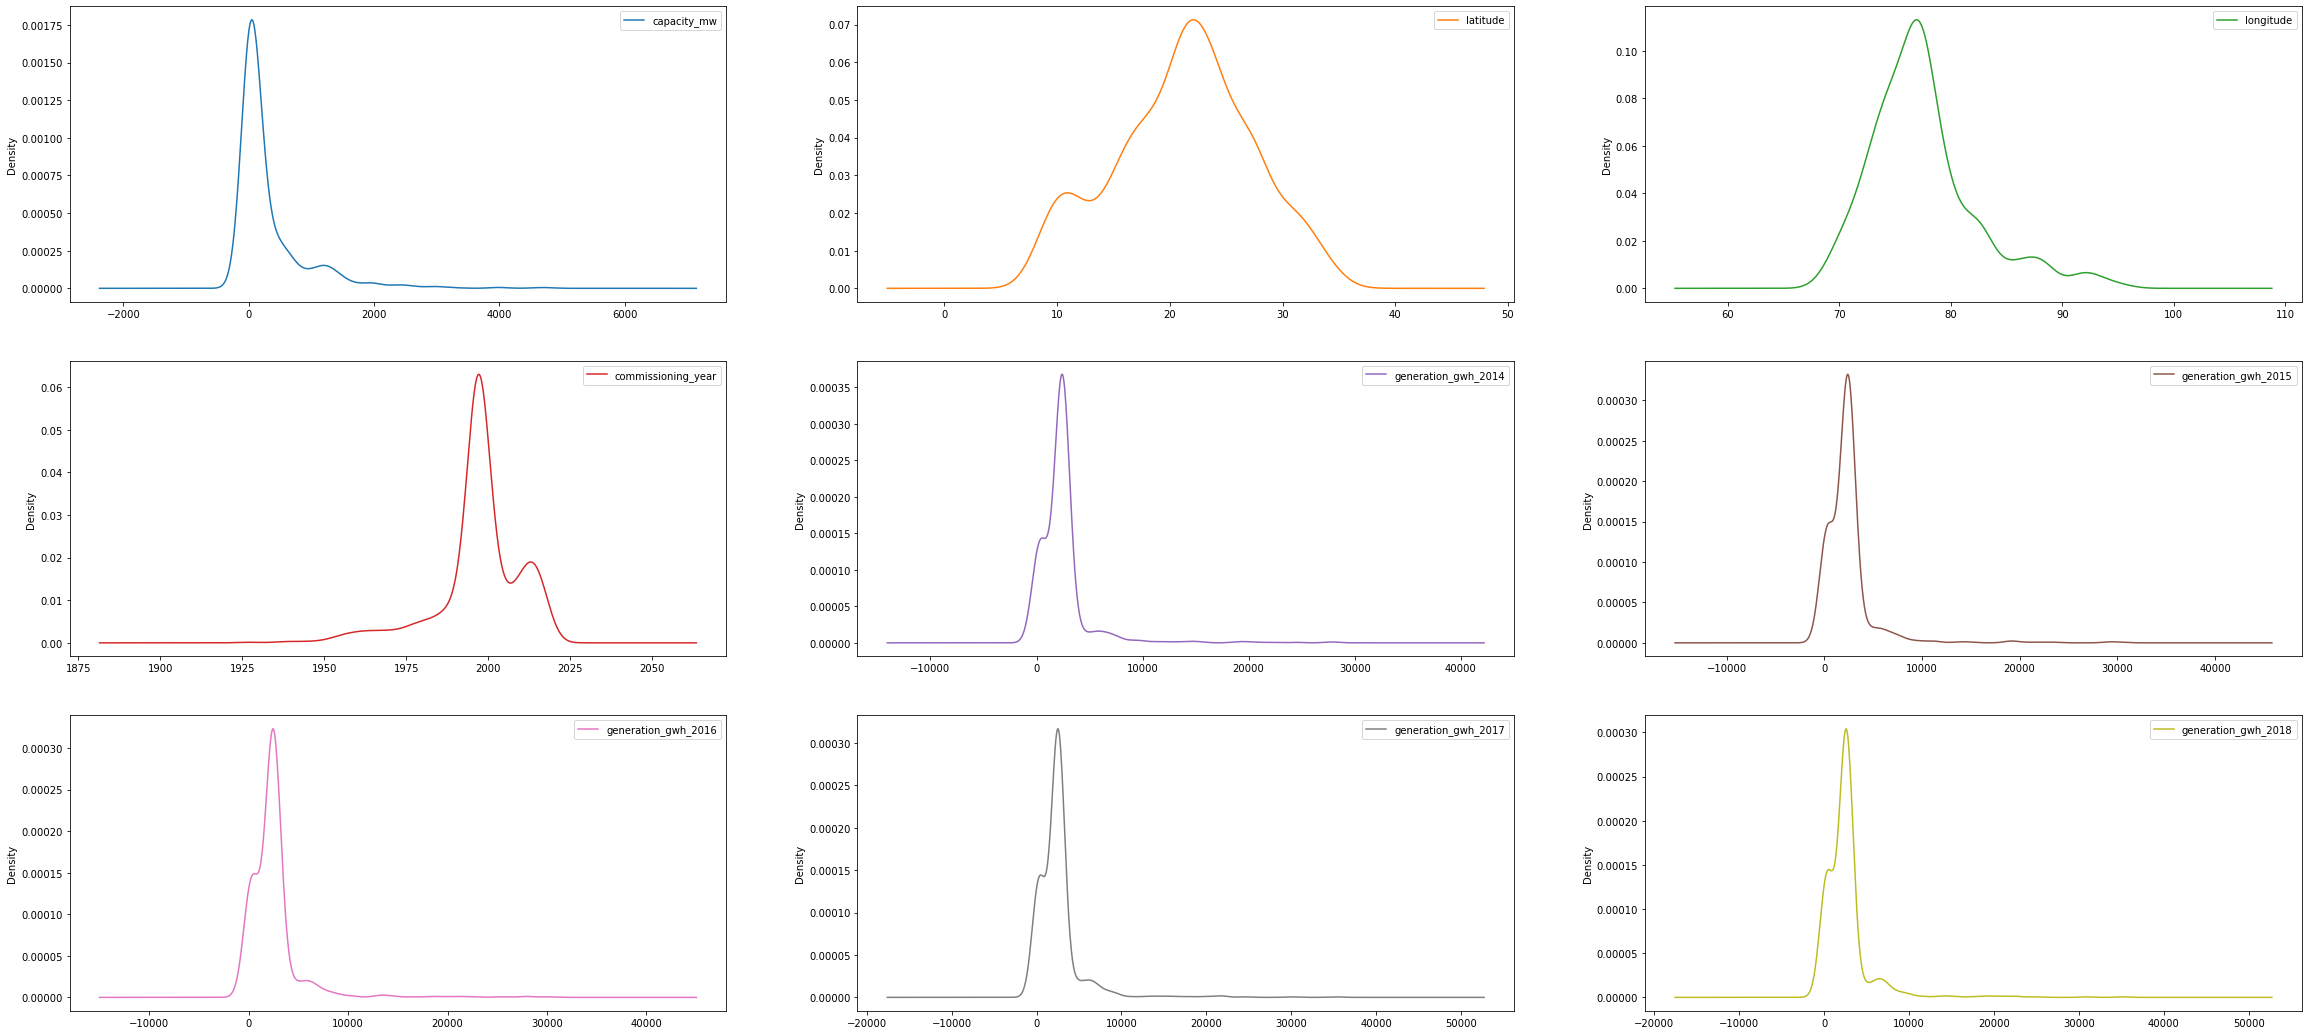

In [22]:
df.plot(kind='density',subplots=True,layout=(4,3),figsize=(40,25),sharex=False)
plt.show()

We see a huge amount of skewness in all the Features except latitude.

Lets set the skewness threshold to +/- 0.6.

### Encoding Categorical Data

In [23]:
df.dtypes

gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

We see that country_long, gppd_idnr, primary_fuel are of object type

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
obj_columns = [ 'gppd_idnr', 'primary_fuel']
for i in obj_columns:
    df[i] = le.fit_transform(df[i])

In [25]:
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657,2.5,28.1839,73.2407,6,2011.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519,98.0,24.7663,74.6090,1,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853,39.2,21.9038,69.3732,7,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0,135.0,23.8712,91.3602,2,2004.000000,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,1800.0,21.9603,82.4091,1,2015.000000,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,491,1600.0,16.2949,77.3568,1,2016.000000,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822,3.0,12.8932,78.1654,6,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891,25.5,15.2758,75.5811,7,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,539,80.0,24.3500,73.7477,1,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


### Checking Outliers and Removing them

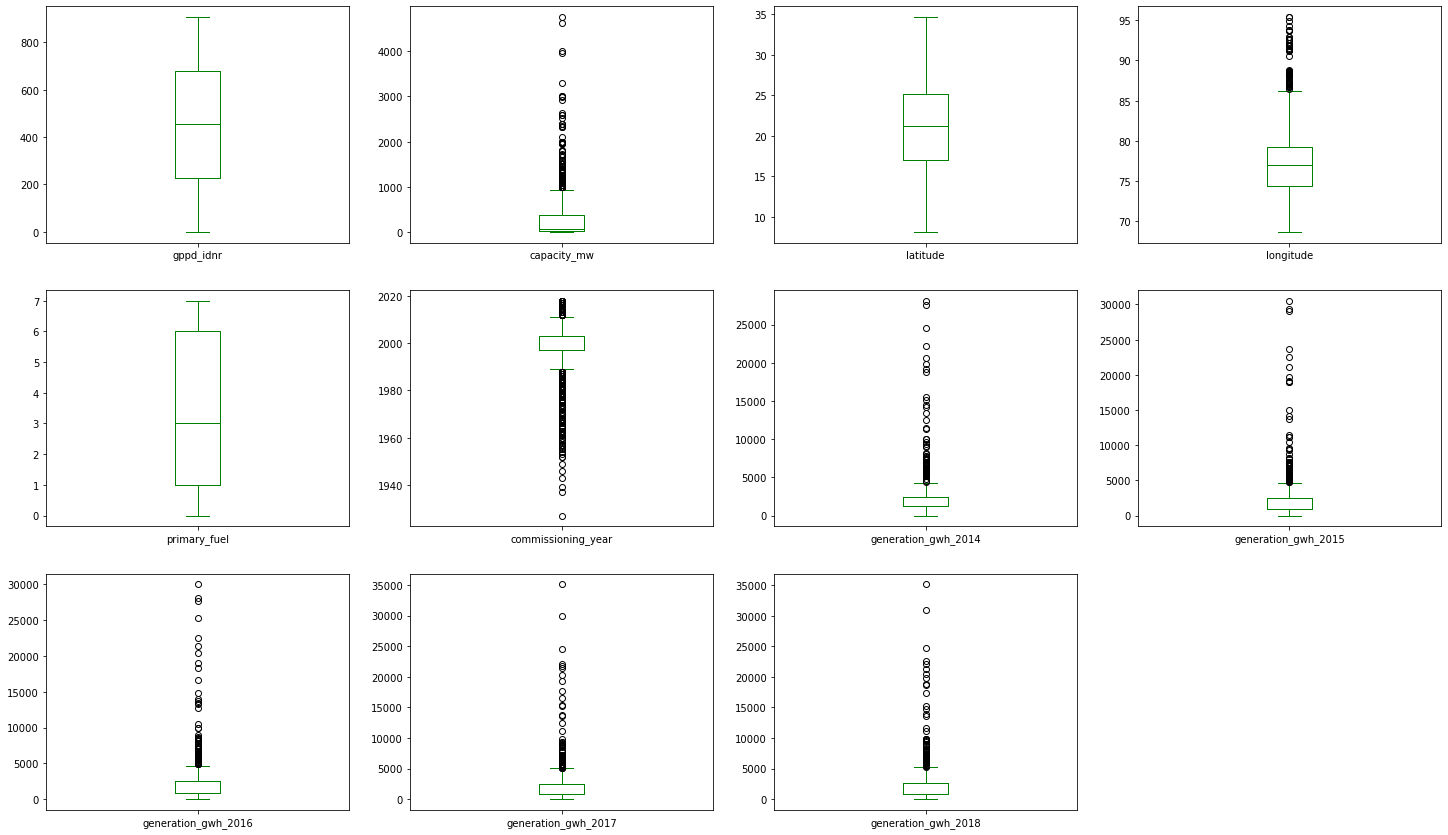

In [26]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(25,20),sharex=True,color='g')
plt.show()

In [27]:
from scipy.stats import zscore

(np.abs(zscore(df)<3).all())

gppd_idnr               True
capacity_mw            False
latitude                True
longitude              False
primary_fuel            True
commissioning_year      True
generation_gwh_2014    False
generation_gwh_2015    False
generation_gwh_2016    False
generation_gwh_2017    False
generation_gwh_2018    False
dtype: bool

In [28]:
z = np.abs(zscore(df))
z.shape

(907, 11)

In [29]:
df=df[(z<3).all(axis=1)]
df.shape

(849, 11)

### Percentage Data Loss

In [30]:
percentage_loss = (907-849)/907*100
percentage_loss

6.39470782800441

### Finding Correlations

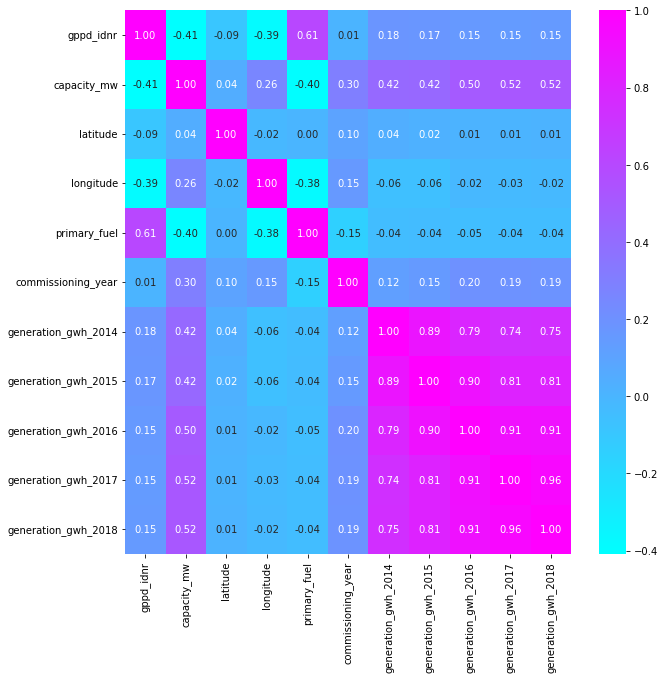

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='cool',fmt='.2f')
plt.show()

In [32]:
df.corr()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
gppd_idnr,1.000000,-0.408795,-0.091243,-0.386766,0.608188,0.007736,0.177965,0.172916,0.153032,0.145982,0.148148
capacity_mw,-0.408795,1.000000,0.042670,0.262424,-0.401192,0.300193,0.416742,0.423619,0.499960,0.516554,0.519444
latitude,-0.091243,0.042670,1.000000,-0.016916,0.000041,0.102747,0.039100,0.022142,0.009684,0.008431,0.010727
longitude,-0.386766,0.262424,-0.016916,1.000000,-0.378015,0.154460,-0.056702,-0.056925,-0.016454,-0.026246,-0.021039
primary_fuel,0.608188,-0.401192,0.000041,-0.378015,1.000000,-0.147009,-0.040296,-0.037116,-0.047494,-0.043606,-0.044692
commissioning_year,0.007736,0.300193,0.102747,0.154460,-0.147009,1.000000,0.123512,0.151429,0.199553,0.191266,0.187783
generation_gwh_2014,0.177965,0.416742,0.039100,-0.056702,-0.040296,0.123512,1.000000,0.889618,0.792159,0.739862,0.745606
generation_gwh_2015,0.172916,0.423619,0.022142,-0.056925,-0.037116,0.151429,0.889618,1.000000,0.902724,0.809522,0.812146
generation_gwh_2016,0.153032,0.499960,0.009684,-0.016454,-0.047494,0.199553,0.792159,0.902724,1.000000,0.912107,0.909394
generation_gwh_2017,0.145982,0.516554,0.008431,-0.026246,-0.043606,0.191266,0.739862,0.809522,0.912107,1.000000,0.958385


We see both positive and negitive correlation with the Target(primary_fuel)

### Splitting the dataset in dfx & dfy

In [33]:
dfx = df.drop('primary_fuel',axis=1)
dfx.shape

(849, 10)

In [34]:
dfy = df['primary_fuel']
dfy.shape

(849,)

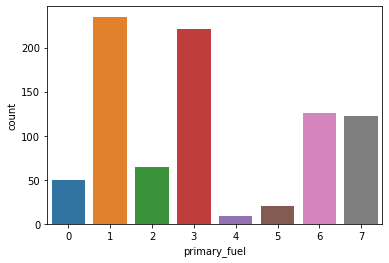

In [35]:
sns.countplot(dfy)
plt.show()

We see that the dataset is imbalanced

### Balancing the dataset using SMOTE

In [36]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y_fuel = sm.fit_resample(dfx,dfy)

In [37]:
x.shape

(1880, 10)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

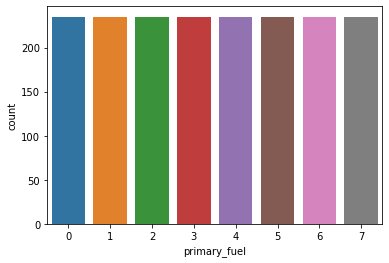

In [38]:
sns.countplot(y_fuel)

Dataset is now balanced

### Removing Skewness

In [39]:
x.skew().sort_values(ascending=False)

capacity_mw            2.025289
generation_gwh_2015    1.529519
generation_gwh_2014    1.431714
generation_gwh_2016    1.379764
generation_gwh_2018    1.306231
longitude              1.305537
generation_gwh_2017    1.132546
latitude               0.067038
gppd_idnr             -0.126447
commissioning_year    -0.890164
dtype: float64

In [40]:
from sklearn.preprocessing import power_transform

x_new = power_transform(x)

In [41]:
X = pd.DataFrame(x_new,columns=x.columns)
X

,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.741128,-1.802048,1.423758,-0.911018,1.685515,0.302961,0.354813,0.369441,0.320805,0.393594
1,0.231421,0.204476,0.847090,-0.393888,-0.118635,0.302961,0.354813,0.369441,0.320805,0.393594
2,1.431167,-0.307631,0.354796,-2.804230,-0.118635,0.302961,0.354813,0.369441,0.320805,0.393594
3,-2.188147,0.380083,0.694120,2.697685,0.721339,-1.003289,-0.674844,-0.572664,-0.888941,-0.794799
4,-2.176434,1.720515,0.364603,1.582583,2.293175,0.624299,1.786763,1.740370,1.463830,1.919583
...,...,...,...,...,...,...,...,...,...,...
1875,1.550985,-0.821148,-1.950120,0.526356,-0.118635,0.302961,0.354813,0.369441,0.320805,0.393594
1876,1.602056,-0.499010,-0.625966,-0.375875,-0.118635,0.302961,0.354813,0.369441,0.320805,0.393594
1877,1.530510,-0.513176,-0.235970,-0.516470,-0.118635,0.302961,0.354813,0.369441,0.320805,0.393594
1878,0.788017,-0.688614,-0.889388,0.079964,-0.118635,0.302961,0.354813,0.369441,0.320805,0.393594


In [42]:
X.skew()

gppd_idnr             -0.294509
capacity_mw            0.024412
latitude              -0.037955
longitude             -0.032727
commissioning_year     0.096489
generation_gwh_2014   -0.352682
generation_gwh_2015   -0.362717
generation_gwh_2016   -0.454979
generation_gwh_2017   -0.478421
generation_gwh_2018   -0.526293
dtype: float64

We see that the skewness is with in the threshold

### Checking VIF

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF_Values'] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
    return(vif.sort_values(by='VIF_Values',ascending=False))

In [45]:
calculate_vif(X)

,Features,VIF_Values
7,generation_gwh_2016,18.743092
9,generation_gwh_2018,14.342731
6,generation_gwh_2015,11.373071
5,generation_gwh_2014,6.459508
8,generation_gwh_2017,6.369199
0,gppd_idnr,2.137650
1,capacity_mw,1.857263
3,longitude,1.291439
4,commissioning_year,1.125565
2,latitude,1.093961


In [46]:
X.drop(['generation_gwh_2016','generation_gwh_2018'],axis=1,inplace=True)
x.drop(['generation_gwh_2016','generation_gwh_2018'],axis=1,inplace=True)

In [47]:
x.shape

(1880, 8)

In [48]:
calculate_vif(X)

,Features,VIF_Values
6,generation_gwh_2015,7.331294
5,generation_gwh_2014,6.232426
7,generation_gwh_2017,3.061689
0,gppd_idnr,2.137496
1,capacity_mw,1.823361
3,longitude,1.277521
4,commissioning_year,1.099210
2,latitude,1.085778


### Scaling the Model

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dfx = sc.fit_transform(X)

In [50]:
X.shape,y_fuel.shape

((1880, 8), (1880,))

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [426]:
lr = LogisticRegression()
max_accuracy = 0
max_random_state = 0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X,y_fuel,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test,pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        max_random_state = i
print('The best accuracy is ', max_accuracy ,'for random_state', max_random_state)

The best accuracy is  0.7170212765957447 for random_state 62


In [428]:
lr = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(X,y_fuel,test_size=0.25,random_state=62)
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.7170212765957447
              precision    recall  f1-score   support

           0       0.71      0.96      0.81        57
           1       0.40      0.45      0.42        47
           2       0.72      0.56      0.63        59
           3       0.76      0.48      0.59        54
           4       0.88      0.84      0.86        68
           5       0.56      0.75      0.64        51
           6       0.84      0.86      0.85        63
           7       0.85      0.75      0.80        71

    accuracy                           0.72       470
   macro avg       0.71      0.70      0.70       470
weighted avg       0.73      0.72      0.72       470



In [54]:
from sklearn.model_selection import cross_val_score

In [433]:
for j in range(2,15):
    cv = cross_val_score(lr,X,y_fuel,cv=j)
    cv_score = cv.mean()
    print('at',j,'cross validation score is',cv_score,'and the accuracy is',accuracy)

at 2 cross validation score is 0.6414893617021277 and the accuracy is 0.7170212765957447
at 3 cross validation score is 0.6574361404527874 and the accuracy is 0.7170212765957447
at 4 cross validation score is 0.6611702127659574 and the accuracy is 0.7170212765957447
at 5 cross validation score is 0.6643617021276597 and the accuracy is 0.7170212765957447
at 6 cross validation score is 0.6675349165326985 and the accuracy is 0.7170212765957447
at 7 cross validation score is 0.6696522697188513 and the accuracy is 0.7170212765957447
at 8 cross validation score is 0.6696808510638297 and the accuracy is 0.7170212765957447
at 9 cross validation score is 0.6686168363799943 and the accuracy is 0.7170212765957447
at 10 cross validation score is 0.6712765957446809 and the accuracy is 0.7170212765957447
at 11 cross validation score is 0.6686274509803922 and the accuracy is 0.7170212765957447
at 12 cross validation score is 0.6707224127606293 and the accuracy is 0.7170212765957447
at 13 cross valida

In [52]:
def Model(model):
    x_train,x_test,y_train,y_test = train_test_split(X,y_fuel,test_size=0.2,random_state=69)
    model.fit(x_test,y_test)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,pred)*100
    cv = cross_val_score(model,X,y_fuel,cv=10)
    cv_score = cv.mean()*100
    print('Report for model', model)
    print('The Accuracy Score is', accuracy)
    print('Confussion Matrix :','\n',confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('Cross Validation Score is ', cv_score)
    print()
    print('Difference between accuracy score and cv is',accuracy-cv_score)

In [435]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
Model(lr)

Report for model LogisticRegression()
The Accuracy Score is 70.47872340425532
Confussion Matrix : 
 [[53  0  0  0  0  1  1  0]
 [ 7 24  4  3  6  2  1  0]
 [ 3  6 22  6  2  4  0  0]
 [ 2  8  2 27  2  7  0  0]
 [ 0  3  0  0 36  0  0  2]
 [16  5  1  5  0 28  0  0]
 [ 0  0  0  0  0  0 40  3]
 [ 3  0  0  0  0  2  4 35]]
              precision    recall  f1-score   support

           0       0.63      0.96      0.76        55
           1       0.52      0.51      0.52        47
           2       0.76      0.51      0.61        43
           3       0.66      0.56      0.61        48
           4       0.78      0.88      0.83        41
           5       0.64      0.51      0.57        55
           6       0.87      0.93      0.90        43
           7       0.88      0.80      0.83        44

    accuracy                           0.70       376
   macro avg       0.72      0.71      0.70       376
weighted avg       0.71      0.70      0.70       376

Cross Validation Score is  67.12

In [436]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
Model(knn)

Report for model KNeighborsClassifier()
The Accuracy Score is 84.30851063829788
Confussion Matrix : 
 [[51  3  0  0  0  1  0  0]
 [ 4 29  3  4  5  1  1  0]
 [ 1  0 33  2  0  6  0  1]
 [ 1  3  5 36  1  2  0  0]
 [ 0  0  0  0 39  0  0  2]
 [ 1  0  1  0  0 53  0  0]
 [ 0  1  0  0  0  0 37  5]
 [ 2  0  0  0  0  0  3 39]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        55
           1       0.81      0.62      0.70        47
           2       0.79      0.77      0.78        43
           3       0.86      0.75      0.80        48
           4       0.87      0.95      0.91        41
           5       0.84      0.96      0.90        55
           6       0.90      0.86      0.88        43
           7       0.83      0.89      0.86        44

    accuracy                           0.84       376
   macro avg       0.84      0.84      0.84       376
weighted avg       0.84      0.84      0.84       376

Cross Validation Score is  83.

Report for model DecisionTreeClassifier()
The Accuracy Score is 100.0
Confussion Matrix : 
 [[55  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  0]
 [ 0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        55
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        44

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376

Cross Validation Score is  88.0851063829

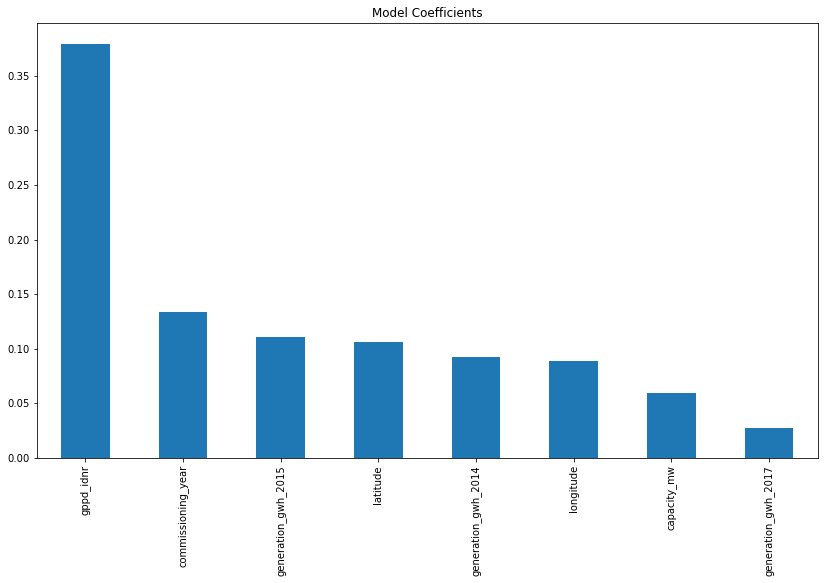

In [437]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
Model(dtc)
coef = pd.Series(dtc.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

Report for model RandomForestClassifier()
The Accuracy Score is 100.0
Confussion Matrix : 
 [[55  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  0]
 [ 0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        55
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        44

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376

Cross Validation Score is  92.0744680851

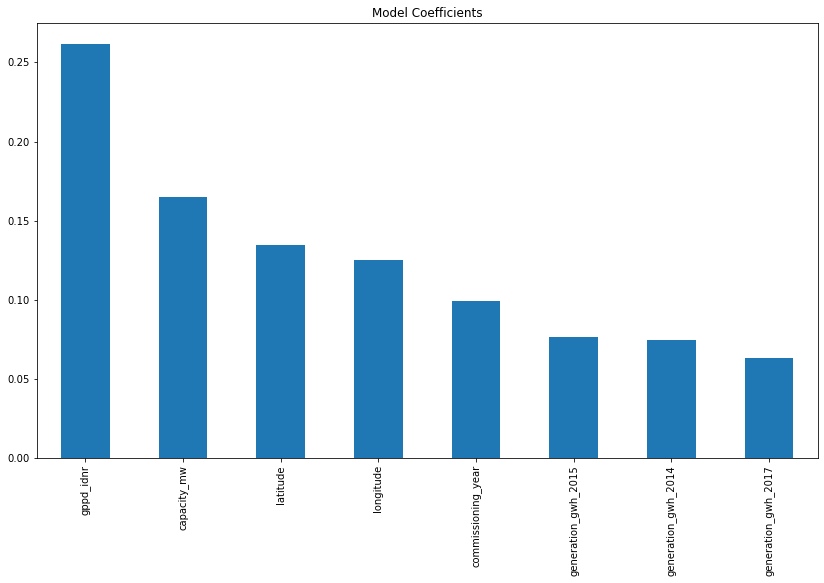

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
Model(rfc)
coef = pd.Series(rfc.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

Report for model ExtraTreesClassifier()
The Accuracy Score is 100.0
Confussion Matrix : 
 [[55  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  0]
 [ 0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        55
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        44

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376

Cross Validation Score is  91.968085106382

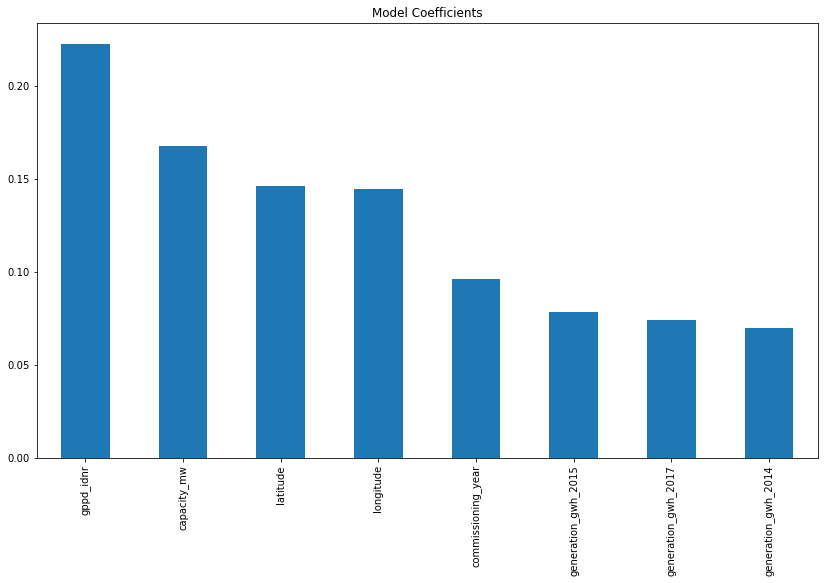

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
Model(etc)
coef = pd.Series(etc.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

In [57]:
from sklearn.svm import SVC
svc = SVC()
Model(svc)

Report for model SVC()
The Accuracy Score is 85.63829787234043
Confussion Matrix : 
 [[54  0  0  0  0  1  0  0]
 [ 7 33  2  2  2  1  0  0]
 [ 2  4 27  2  0  8  0  0]
 [ 0  3  2 42  0  1  0  0]
 [ 0  0  0  0 41  0  0  0]
 [ 4  0  0  0  0 51  0  0]
 [ 0  0  0  0  0  0 36  7]
 [ 3  0  0  0  0  0  3 38]]
              precision    recall  f1-score   support

           0       0.77      0.98      0.86        55
           1       0.82      0.70      0.76        47
           2       0.87      0.63      0.73        43
           3       0.91      0.88      0.89        48
           4       0.95      1.00      0.98        41
           5       0.82      0.93      0.87        55
           6       0.92      0.84      0.88        43
           7       0.84      0.86      0.85        44

    accuracy                           0.86       376
   macro avg       0.87      0.85      0.85       376
weighted avg       0.86      0.86      0.85       376

Cross Validation Score is  82.07446808510639

D

In [59]:
from sklearn.ensemble import BaggingClassifier
bgc = BaggingClassifier()
Model(bgc)

Report for model BaggingClassifier()
The Accuracy Score is 98.93617021276596
Confussion Matrix : 
 [[55  0  0  0  0  0  0  0]
 [ 0 45  0  1  1  0  0  0]
 [ 0  0 42  0  0  1  0  0]
 [ 0  1  0 47  0  0  0  0]
 [ 0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.98      0.96      0.97        47
           2       1.00      0.98      0.99        43
           3       0.98      0.98      0.98        48
           4       0.98      1.00      0.99        41
           5       0.98      1.00      0.99        55
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        44

    accuracy                           0.99       376
   macro avg       0.99      0.99      0.99       376
weighted avg       0.99      0.99      0.99       376

Cross Validation Score is  90.319

Report for model GradientBoostingClassifier()
The Accuracy Score is 100.0
Confussion Matrix : 
 [[55  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  0]
 [ 0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        55
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        44

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376

Cross Validation Score is  90.425531

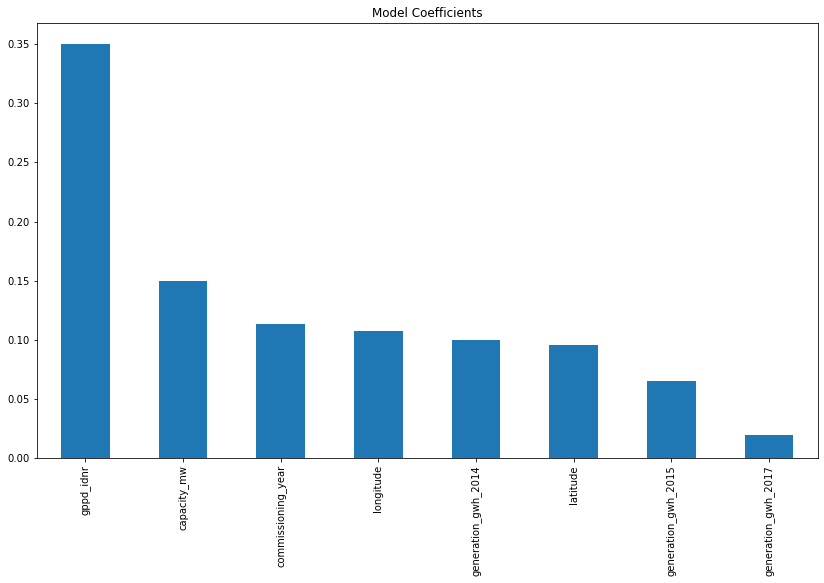

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
Model(gbc)
coef = pd.Series(gbc.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

From above we see that KNN,Logistic Regression and SVC are 3 best models from tree type ExtraTreesClassifier is the best

### HyperParameter Tuning

In [451]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

parameters= {'n_neighbors':list(range(4,10)),
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
             'leaf_size':list(range(5,20))
            }
gcv = GridSearchCV(knn,parameters,cv=10,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'algorithm': 'auto', 'leaf_size': 5, 'metric': 'manhattan', 'n_neighbors': 4}

In [452]:
gcv.best_estimator_

KNeighborsClassifier(leaf_size=5, metric='manhattan', n_neighbors=4)

In [450]:
knn = KNeighborsClassifier(leaf_size=5, metric='manhattan', n_neighbors=4)
Model(knn)

Report for model KNeighborsClassifier(leaf_size=5, metric='manhattan', n_neighbors=4)
The Accuracy Score is 86.96808510638297
Confussion Matrix : 
 [[52  3  0  0  0  0  0  0]
 [ 4 35  2  2  3  1  0  0]
 [ 1  0 38  0  1  2  0  1]
 [ 1  5  5 35  0  2  0  0]
 [ 0  0  0  0 41  0  0  0]
 [ 2  0  3  0  0 50  0  0]
 [ 0  0  0  0  0  0 38  5]
 [ 2  0  0  0  0  2  2 38]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        55
           1       0.81      0.74      0.78        47
           2       0.79      0.88      0.84        43
           3       0.95      0.73      0.82        48
           4       0.91      1.00      0.95        41
           5       0.88      0.91      0.89        55
           6       0.95      0.88      0.92        43
           7       0.86      0.86      0.86        44

    accuracy                           0.87       376
   macro avg       0.87      0.87      0.87       376
weighted avg       0.87      0.87      

In [454]:
lr = LogisticRegression()

parameters = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'C':[0.001,0.01,0.1,1,10],'penalty':['l1', 'l2', 'elasticnet', 'none']}
gcv = GridSearchCV(lr,parameters,cv=11,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'C': 0.001, 'penalty': 'none', 'solver': 'lbfgs'}

In [455]:
gcv.best_estimator_

LogisticRegression(C=0.001, penalty='none')

In [456]:
lr = LogisticRegression(C=0.001, penalty='none')
Model(lr)

Report for model LogisticRegression(C=0.001, penalty='none')
The Accuracy Score is 75.2659574468085
Confussion Matrix : 
 [[53  0  0  0  0  2  0  0]
 [ 7 23  4  2  6  5  0  0]
 [ 1  6 23  6  1  6  0  0]
 [ 0  8  2 29  2  7  0  0]
 [ 0  3  0  0 37  0  0  1]
 [ 3  5  1  7  0 39  0  0]
 [ 0  0  0  0  0  0 40  3]
 [ 1  0  0  0  0  0  4 39]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88        55
           1       0.51      0.49      0.50        47
           2       0.77      0.53      0.63        43
           3       0.66      0.60      0.63        48
           4       0.80      0.90      0.85        41
           5       0.66      0.71      0.68        55
           6       0.91      0.93      0.92        43
           7       0.91      0.89      0.90        44

    accuracy                           0.75       376
   macro avg       0.75      0.75      0.75       376
weighted avg       0.75      0.75      0.75       376

Cross Vali

In [457]:
svc = SVC()

parameters = {'C': [0.1,1, 10, 100], 'gamma': [10,1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
gcv = GridSearchCV(svc,parameters,cv=11,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [458]:
gcv.best_estimator_

SVC(C=100, gamma=1)

In [459]:
svc = SVC(C=100, gamma=1)
Model(svc)

Report for model SVC(C=100, gamma=1)
The Accuracy Score is 99.46808510638297
Confussion Matrix : 
 [[55  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0]
 [ 0  0 41  0  0  2  0  0]
 [ 0  0  0 48  0  0  0  0]
 [ 0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        47
           2       1.00      0.95      0.98        43
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        41
           5       0.96      1.00      0.98        55
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        44

    accuracy                           0.99       376
   macro avg       1.00      0.99      0.99       376
weighted avg       0.99      0.99      0.99       376

Cross Validation Score is  91.914

In [112]:
et = ExtraTreesClassifier()
parameters={
        'n_estimators': list(range(25,126,10)),
        'min_samples_leaf': list(range(2,30,2)),
        'criterion':["gini", "entropy"]
    }
gcv = GridSearchCV(et,parameters,cv=11)
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'gini', 'min_samples_leaf': 2, 'n_estimators': 45}

In [113]:
gcv.best_estimator_

ExtraTreesClassifier(min_samples_leaf=2, n_estimators=45)

In [118]:
et = ExtraTreesClassifier(min_samples_leaf=2, n_estimators=45)

Model(et)

Report for model ExtraTreesClassifier(min_samples_leaf=2, n_estimators=45)
The Accuracy Score is 96.01063829787235
Confussion Matrix : 
 [[54  1  0  0  0  0  0  0]
 [ 7 38  0  2  0  0  0  0]
 [ 0  0 40  0  0  3  0  0]
 [ 0  0  0 48  0  0  0  0]
 [ 0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 2  0  0  0  0  0  0 42]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        55
           1       0.97      0.81      0.88        47
           2       1.00      0.93      0.96        43
           3       0.96      1.00      0.98        48
           4       1.00      1.00      1.00        41
           5       0.95      1.00      0.97        55
           6       1.00      1.00      1.00        43
           7       1.00      0.95      0.98        44

    accuracy                           0.96       376
   macro avg       0.97      0.96      0.96       376
weighted avg       0.96      0.96      0.96       

### Final Model : KNeighborsClassifier With HyperParameter Tuning

In [460]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(leaf_size=5, metric='manhattan', n_neighbors=4)
Model(knn)

Report for model KNeighborsClassifier(leaf_size=5, metric='manhattan', n_neighbors=4)
The Accuracy Score is 86.96808510638297
Confussion Matrix : 
 [[52  3  0  0  0  0  0  0]
 [ 4 35  2  2  3  1  0  0]
 [ 1  0 38  0  1  2  0  1]
 [ 1  5  5 35  0  2  0  0]
 [ 0  0  0  0 41  0  0  0]
 [ 2  0  3  0  0 50  0  0]
 [ 0  0  0  0  0  0 38  5]
 [ 2  0  0  0  0  2  2 38]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        55
           1       0.81      0.74      0.78        47
           2       0.79      0.88      0.84        43
           3       0.95      0.73      0.82        48
           4       0.91      1.00      0.95        41
           5       0.88      0.91      0.89        55
           6       0.95      0.88      0.92        43
           7       0.86      0.86      0.86        44

    accuracy                           0.87       376
   macro avg       0.87      0.87      0.87       376
weighted avg       0.87      0.87      

### Saving Best Model

In [461]:
file_name = 'Global_PowerPlant_Primary_Fuel.pkl'
import pickle
pickle.dump(knn,open(file_name,'wb'))

### Finding capacity_mw

In [317]:
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657,2.5,28.1839,73.2407,6,2011.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519,98.0,24.7663,74.6090,1,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853,39.2,21.9038,69.3732,7,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0,135.0,23.8712,91.3602,2,2004.000000,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,1800.0,21.9603,82.4091,1,2015.000000,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,491,1600.0,16.2949,77.3568,1,2016.000000,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822,3.0,12.8932,78.1654,6,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891,25.5,15.2758,75.5811,7,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,539,80.0,24.3500,73.7477,1,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


### Splitting the dataframe in x & y

In [318]:
x = df.drop('capacity_mw',axis=1)
x.shape

(849, 10)

In [319]:
y = df['capacity_mw']
y.shape

(849,)

### Removing Skewness

In [320]:
x.skew().sort_values(ascending=False)

generation_gwh_2014    1.526648
generation_gwh_2016    1.413144
generation_gwh_2015    1.389889
generation_gwh_2018    1.315481
generation_gwh_2017    1.278735
longitude              0.921980
primary_fuel           0.408694
gppd_idnr             -0.079104
latitude              -0.109823
commissioning_year    -0.845654
dtype: float64

In [321]:
from sklearn.preprocessing import power_transform

x_new = power_transform(x)

In [322]:
X = pd.DataFrame(x_new,columns=x.columns)
X

,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.743646,1.164277,-0.928072,1.131644,1.292854,0.327200,0.356092,0.359399,0.360086,0.375133
1,0.281373,0.595264,-0.509209,-1.001767,-0.181973,0.327200,0.356092,0.359399,0.360086,0.375133
2,1.359484,0.122311,-2.363978,1.404554,-0.181973,0.327200,0.356092,0.359399,0.360086,0.375133
3,-2.115014,0.446997,2.442106,-0.388523,0.501339,-1.046002,-0.731478,-0.683964,-0.905238,-0.925585
4,-2.099361,0.131611,1.253969,-1.001767,1.795252,0.665917,1.898269,1.935543,1.564919,2.122435
...,...,...,...,...,...,...,...,...,...,...
844,0.183910,-0.793140,0.219861,-1.001767,1.926982,0.327200,-2.096477,-1.420156,-0.721222,-0.867297
845,1.264726,-1.339555,0.409525,1.131644,-0.181973,0.327200,0.356092,0.359399,0.360086,0.375133
846,1.474441,-0.957619,-0.235273,1.404554,-0.181973,0.327200,0.356092,0.359399,0.360086,0.375133
847,0.350163,0.526266,-0.768095,-1.001767,-0.181973,0.327200,0.356092,0.359399,0.360086,0.375133


In [323]:
X.skew().sort_values(ascending=False)

commissioning_year     0.031733
longitude              0.000035
primary_fuel          -0.059648
latitude              -0.069694
generation_gwh_2014   -0.243975
generation_gwh_2015   -0.309166
generation_gwh_2016   -0.309194
gppd_idnr             -0.324126
generation_gwh_2017   -0.340677
generation_gwh_2018   -0.354764
dtype: float64

We see all the values are with in the threshold

### Calculating VIF

In [324]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF_Values'] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
    return(vif.sort_values(by='VIF_Values',ascending=False))

In [325]:
calculate_vif(X)

,Features,VIF_Values
9,generation_gwh_2018,12.345724
7,generation_gwh_2016,11.899260
8,generation_gwh_2017,11.614500
6,generation_gwh_2015,8.046135
5,generation_gwh_2014,4.224755
0,gppd_idnr,1.625067
3,primary_fuel,1.457257
2,longitude,1.299745
4,commissioning_year,1.114328
1,latitude,1.060939


In [326]:
X.drop(['generation_gwh_2016','generation_gwh_2018'],axis=1,inplace=True)
x.drop(['generation_gwh_2016','generation_gwh_2018'],axis=1,inplace=True)

In [327]:
calculate_vif(X)

,Features,VIF_Values
6,generation_gwh_2015,5.202544
5,generation_gwh_2014,4.190771
7,generation_gwh_2017,2.945551
0,gppd_idnr,1.623521
3,primary_fuel,1.457255
2,longitude,1.293362
4,commissioning_year,1.098146
1,latitude,1.059556


### Scaling the Model

In [328]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dfx = sc.fit_transform(X)

In [329]:
dfx.shape,y.shape

((849, 8), (849,))

In [330]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [331]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(dfx,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print('At random_state',i,'the training accuracy is',r2_score(y_train,pred_train))
    print('At random_state',i,'the testing accuracy is',r2_score(y_test,pred_test))
    print()

At random_state 0 the training accuracy is 0.4984329650136874
At random_state 0 the testing accuracy is 0.4479309629989282

At random_state 1 the training accuracy is 0.49401082531395146
At random_state 1 the testing accuracy is 0.47578750189694463

At random_state 2 the training accuracy is 0.47206649462603645
At random_state 2 the testing accuracy is 0.5397989548271522

At random_state 3 the training accuracy is 0.47469858919189856
At random_state 3 the testing accuracy is 0.5221479840651087

At random_state 4 the training accuracy is 0.5030184665359124
At random_state 4 the testing accuracy is 0.4413561899646199

At random_state 5 the training accuracy is 0.4732302993050509
At random_state 5 the testing accuracy is 0.5294171369091564

At random_state 6 the training accuracy is 0.4554370823507975
At random_state 6 the testing accuracy is 0.5509190555684453

At random_state 7 the training accuracy is 0.49864600319556973
At random_state 7 the testing accuracy is 0.45311543980053115

At

In [332]:
x_train,x_test,y_train,y_test = train_test_split(dfx,y,test_size=0.25,random_state=13)
lr.fit(x_train,y_train)
pred_test = lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.4866169538355304


### Cross-Validation of the Model

In [333]:
Training_Accuracy = r2_score(y_train,pred_train)
Testing_Accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,20):
    cv_score = cross_val_score(lr,dfx,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and the accuracy score for training is {Training_Accuracy} and the accuracy for testing is {Testing_Accuracy}")
    print()

At cross fold 2 the cv score is 0.14846077244979844 and the accuracy score for training is -0.5000446917972878 and the accuracy for testing is 0.4866169538355304

At cross fold 3 the cv score is 0.3126485690714451 and the accuracy score for training is -0.5000446917972878 and the accuracy for testing is 0.4866169538355304

At cross fold 4 the cv score is 0.35034871576391036 and the accuracy score for training is -0.5000446917972878 and the accuracy for testing is 0.4866169538355304

At cross fold 5 the cv score is 0.4096024505762398 and the accuracy score for training is -0.5000446917972878 and the accuracy for testing is 0.4866169538355304

At cross fold 6 the cv score is 0.41463334848820077 and the accuracy score for training is -0.5000446917972878 and the accuracy for testing is 0.4866169538355304

At cross fold 7 the cv score is 0.3971937939970413 and the accuracy score for training is -0.5000446917972878 and the accuracy for testing is 0.4866169538355304

At cross fold 8 the cv sc

In [334]:
def Model_Reg(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(model,dfx,y,cv = 12)
    cv_score = np.abs(np.mean(cv_score))*100
    print('Model Report')
    print('MSE',mean_squared_error(y_test,pred))
    print('Mean Absolute Error',mean_absolute_error(y_test,pred_test))
    r2_Score = r2_score(y_test,pred_test)*100
    print('r2_score',r2_Score)
    print('CV', cv_score)
    coef = pd.Series(model.coef_,x.columns).sort_values(ascending=False)
    coef.plot(kind= 'bar', title = 'Model Coefficients')
    print('Difference between r2_score and cv is ',r2_Score-cv_score)

In [335]:
def Model_Tree(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(model,dfx,y,cv = 12)
    cv_score = np.abs(np.mean(cv_score))*100
    print('Model Report')
    print('MSE',mean_squared_error(y_test,pred))
    print('Mean Absolute Error',mean_absolute_error(y_test,pred_test))
    r2_Score = r2_score(y_test,pred_test)*100
    print('r2_score',r2_Score)
    print('CV', cv_score)
    coef = pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
    coef.plot(kind= 'bar', title = 'Model Coefficients')
    print('Difference between r2_score and cv is ',r2_Score-cv_score)

Model Report
MSE 85428.11667662104
Mean Absolute Error 207.16477069316224
r2_score 48.66169538355304
CV 44.26382914533316
Difference between r2_score and cv is  4.397866238219876


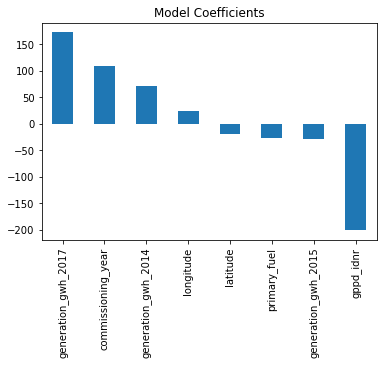

In [336]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
Model_Reg(lr)

Model Report
MSE 85387.84739868542
Mean Absolute Error 207.1647706931622
r2_score 48.66169538355304
CV 44.292292726172036
Difference between r2_score and cv is  4.369402657381002


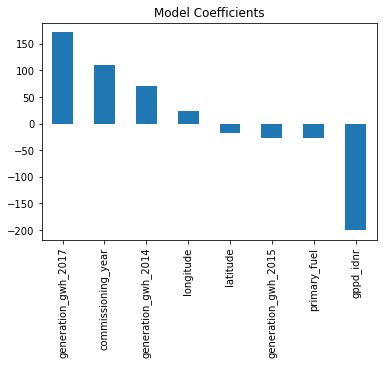

In [171]:
from sklearn.linear_model import Ridge
ridge = Ridge()
Model_Reg(ridge)

Model Report
MSE 85126.38550908644
Mean Absolute Error 207.1647706931622
r2_score 48.66169538355304
CV 44.51875325450447
Difference between r2_score and cv is  4.142942129048571


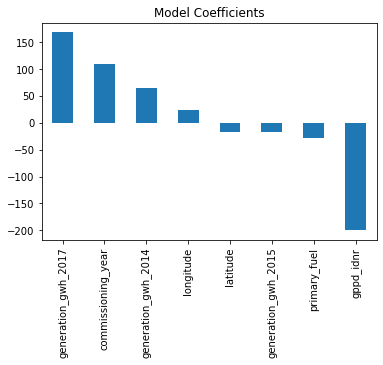

In [172]:
from sklearn.linear_model import Lasso
lasso = Lasso()
Model_Reg(lasso)

Model Report
MSE 72083.66539267721
Mean Absolute Error 207.1647706931622
r2_score 48.66169538355304
CV 64.61075581337732
Difference between r2_score and cv is  -15.949060429824286


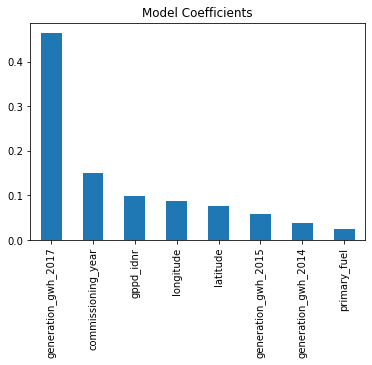

In [176]:
from sklearn.ensemble import AdaBoostRegressor

ad = AdaBoostRegressor()
Model_Tree(ad)

Model Report
MSE 91149.07362384538
Mean Absolute Error 207.1647706931622
r2_score 48.66169538355304
CV 42.533964215957184
Difference between r2_score and cv is  6.127731167595854


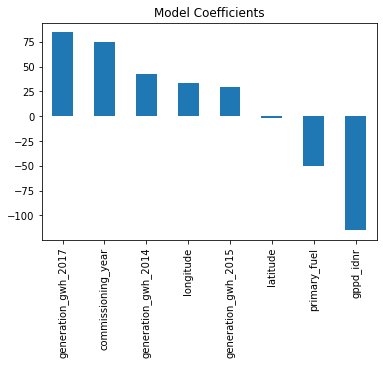

In [220]:
from sklearn.linear_model import ElasticNet

en = ElasticNet()
Model_Reg(en)

### HyperParameter Tuning

In [347]:
from sklearn.model_selection import GridSearchCV
rd =Ridge()
Parameters = {'alpha': (np.logspace(-8, 8, 100)) , "fit_intercept": [True, False],"solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}


gcv = GridSearchCV(ridge,Parameters,cv=7)
gcv.fit(x_train,y_train)
gcv.best_params_

{'alpha': 34.30469286314926, 'fit_intercept': True, 'solver': 'lsqr'}

In [348]:
gcv.best_estimator_

Ridge(alpha=34.30469286314926, solver='lsqr')

Model Report
MSE 84823.49347739977
Mean Absolute Error 207.16477069316224
r2_score 48.66169538355304
CV 44.9218892697415
Difference between r2_score and cv is  3.7398061138115395


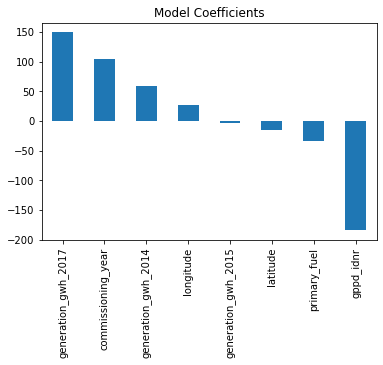

In [349]:
rd = Ridge(alpha=34.30469286314926, solver='lsqr')
Model_Reg(rd)

In [351]:
from sklearn.model_selection import GridSearchCV
lasso =Lasso()
Parameters = {'alpha': (np.logspace(-8, 8, 100)) , "fit_intercept": [True, False],'max_iter':[500,2000,500],'selection':['cyclic', 'random']}


gcv = GridSearchCV(lasso,Parameters,cv=7)
gcv.fit(x_train,y_train)
gcv.best_params_

{'alpha': 5.336699231206324,
 'fit_intercept': True,
 'max_iter': 500,
 'selection': 'random'}

In [352]:
gcv.best_estimator_

Lasso(alpha=5.336699231206324, max_iter=500, selection='random')

Model Report
MSE 84799.81143876047
Mean Absolute Error 207.16477069316224
r2_score 48.66169538355304
CV 44.99170287560463
Difference between r2_score and cv is  3.6699925079484075


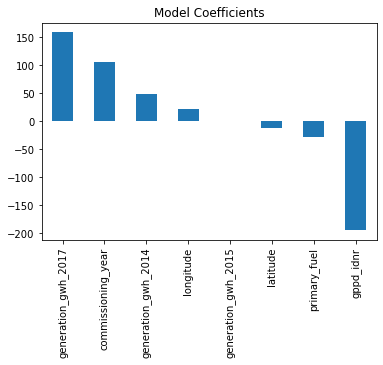

In [353]:
lasso = Lasso(alpha=5.336699231206324, max_iter=500, selection='random')
Model_Reg(lasso)

### Final Model: Lasso with HyperParameter Tuning

Model Report
MSE 84800.48993171111
Mean Absolute Error 207.16477069316224
r2_score 48.66169538355304
CV 44.98893391014698
Difference between r2_score and cv is  3.672761473406055


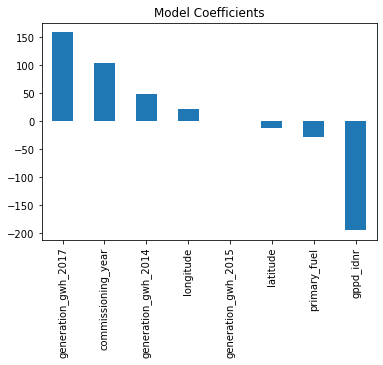

In [354]:
lasso = Lasso(alpha=5.336699231206324, max_iter=500, selection='random')
Model_Reg(lasso)

### Saving Best Model

In [356]:
import pickle
file_name = 'Global_PowerPlant_Calculate_mw.pkl'
pickle.dump(lasso,open(file_name,'wb'))